In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import skimage
from skimage.transform import resize
from pathlib import Path
import os
import matplotlib.image as mpimg

## 1. Preprocessing (resizing and from img to arrays)

(469, 224, 224, 1)


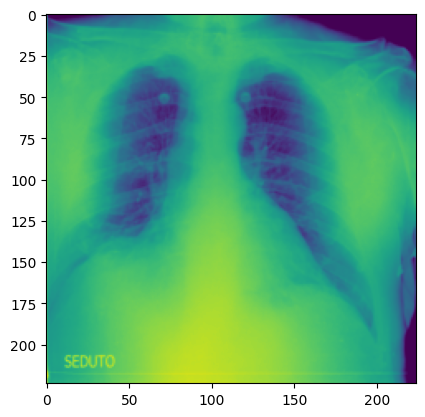

In [5]:
#1. load data
root = "/Users/xinyuchen/Desktop/Fall2023 &Spr24/Spring 2024/CS 109B/CS 109B project proposals/COVID-detection-from-XRay/Data/"
path = os.path.join(root,"Brixia/dicom_clean_png")

img_size = 224 #img size to resize to

df_train_img = list(Path(path).glob("*.png"))
    #tested on one image to see #df_train_img = list(Path(path).glob("10496945206307687790.dcm.png"))

#2. convert images to numpy array
df_train_np = np.empty((len(df_train_img), img_size, img_size, 1), dtype=np.float32)
mpimg.imread(df_train_img[0])

#3. resize images 
for i, img_name in enumerate(df_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        df_train_np[i] = img_resize
    except:
        continue
print(df_train_np.shape)

#4. save processed images
np.save(os.path.join(root,"Brixia images size 224 arrays"), df_train_np, allow_pickle=False, fix_imports=False)

#5. look at a sample from the data, now in numpy format, no longer img format
plt.imshow(df_train_np[10])

## 2. EDA

In [8]:
#load data preprocessed above
preprocessed_path = os.path.join(root,"Brixia/Brixia images size 224 arrays.npy")
df_train = np.load(preprocessed_path)
